In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# check the shape of data
df.shape

(1338, 7)

In [4]:
# Check the data type of all column.
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
# Check the unique value of every column
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
# Check the sum of null vallue for every column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

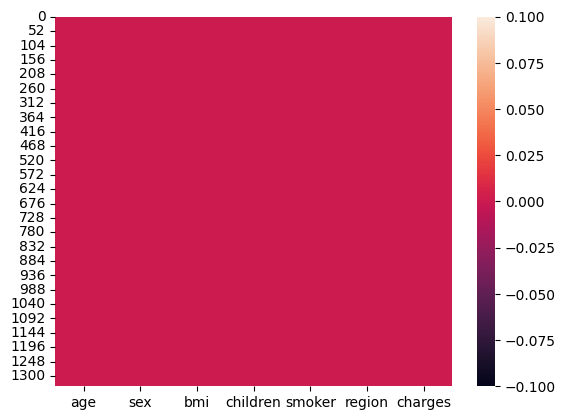

In [8]:
# Visualize with heatmap for null values
sns.heatmap(df.isnull())

In [9]:
# Check the dulplicate rows
print("Total Duplicate Rows are",df.duplicated().sum())

Total Duplicate Rows are 1


In [10]:
# Get the index of duplicate rows
duplicate_indices = df[df.duplicated()].index
print(duplicate_indices)

Index([581], dtype='int64')


In [11]:
# remove the duplicate rows
df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
#  separating the numerical and categorical column
categorical_col=[]
numerical_col=[]
for col in df.dtypes.index:
    if(df.dtypes[col] =='object'):
        categorical_col.append(col)
    else:
        numerical_col.append(col)
print("Categorical Column : ",categorical_col)
print("Numerical Column :",numerical_col)

Categorical Column :  ['sex', 'smoker', 'region']
Numerical Column : ['age', 'bmi', 'children', 'charges']


In [13]:
# checking number of unique values in each column
df.nunique().to_frame("No. of unique vlaues")

,No. of unique vlaues
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


here i observe that charges column this is target column and this has a continuous value so this is regression problem.

In [14]:
# Check the value count
for col in df.columns:
    print(df[col].value_counts())
    print('----------end------------------')

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
----------end------------------
sex
male      675
female    662
Name: count, dtype: int64
----------end------------------
bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64
----------end------------------
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
----------end------------------
smoker
no     1063
yes     274
Name: count, dtype: int64
----------end------------------
region
s

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categorical_col:
    df[col]=le.fit_transform(df[col])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


here convert the categorical column into numerical.
sex : 0 for female and 1 for male
smoker : 0 for no and 1 for yes
region : 0 for northeast , 1 for northwest  , 2 for southeast , 3 for southwest

# Description of dataset

In [16]:
# desciption of all data
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [17]:
'''here i see the count of every column same i.e no null values in all column.
mean or median(50% ) almost same i.e similar to normal distributed no skewness.
outlier present in data'''


'here i see the count of every column same i.e no null values in all column.\nmean or median(50% ) almost same i.e similar to normal distributed no skewness.\noutlier present in data'

# Data Visualization

sex
1    675
0    662
Name: count, dtype: int64


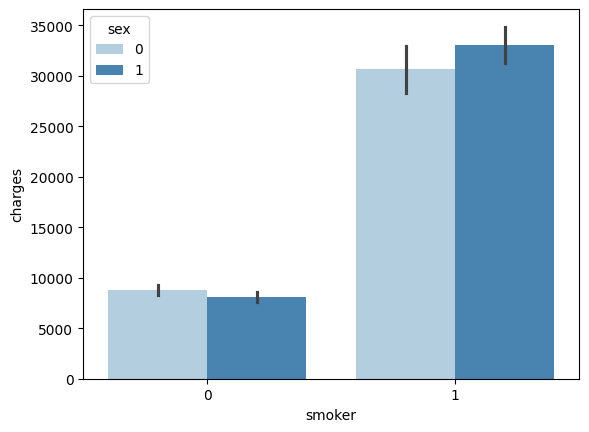

In [18]:
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')
print(df['sex'].value_counts())

smoker
0    1063
1     274
Name: count, dtype: int64


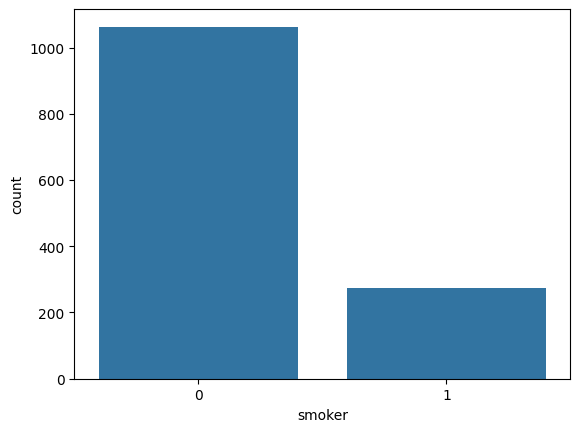

In [19]:
# Visualize the count of smoker
sns.countplot(x="smoker",data=df)
print(df["smoker"].value_counts())

here we see the imbalaced class problem present .but i have no changed because this is a categorical column.

region
2    364
3    325
1    324
0    324
Name: count, dtype: int64


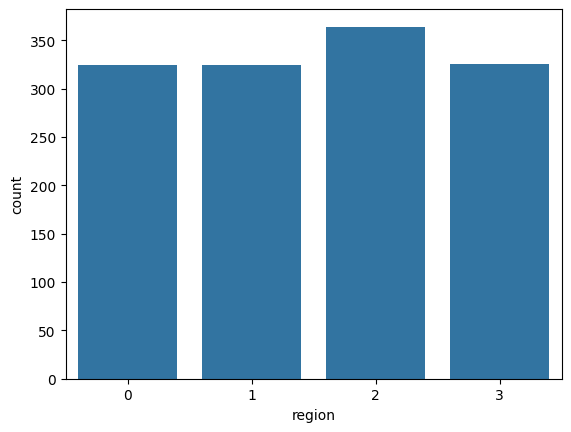

In [20]:
# visualize the count of region
sns.countplot(x="region",data=df)
print(df["region"].value_counts())

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


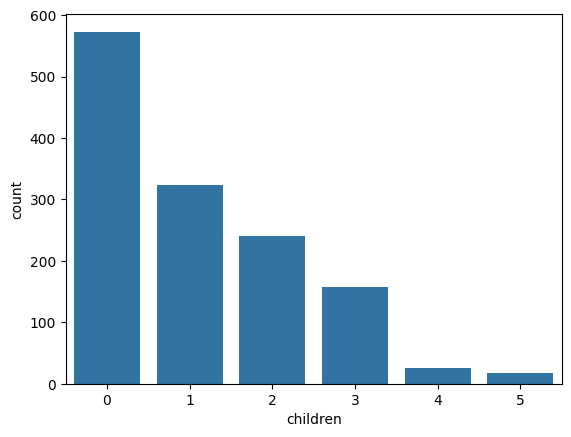

In [21]:
# visualize the count of children
sns.countplot(x="children",data=df)
print(df["children"].value_counts())

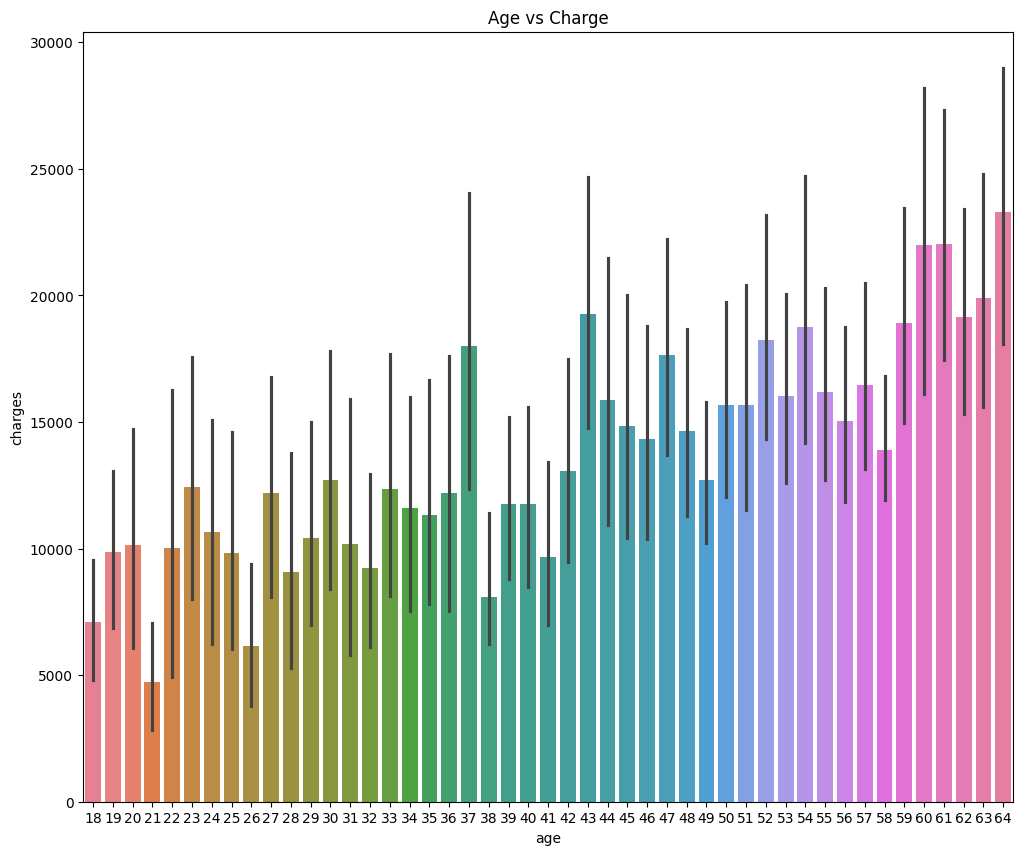

In [22]:
plt.figure(figsize=(12,10))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='husl')
plt.show()

<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

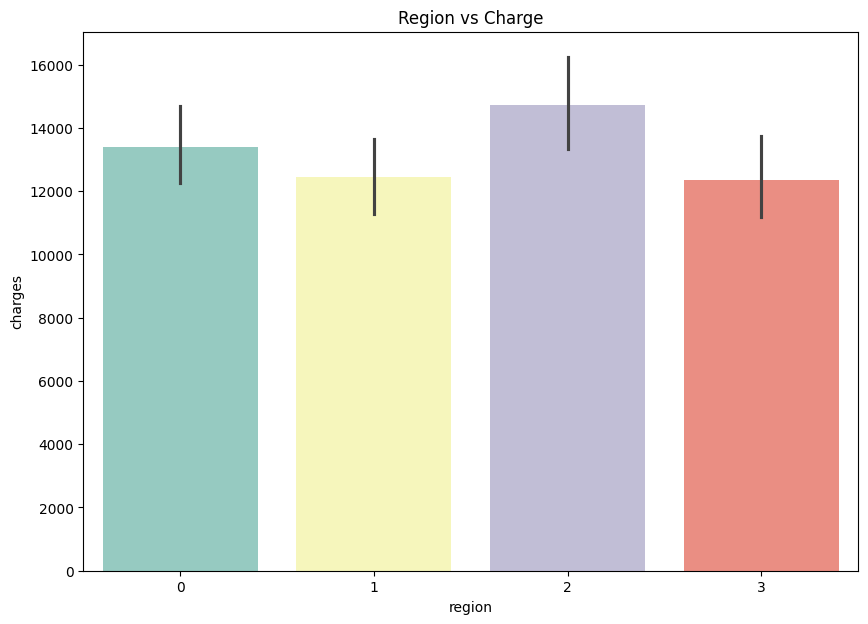

In [23]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

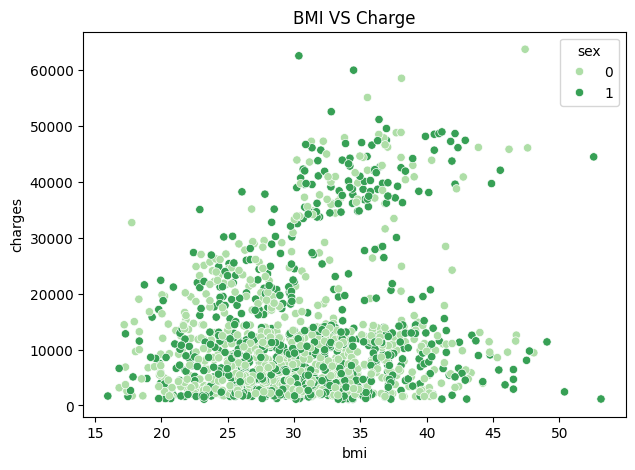

In [24]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Greens')
plt.title('BMI VS Charge')

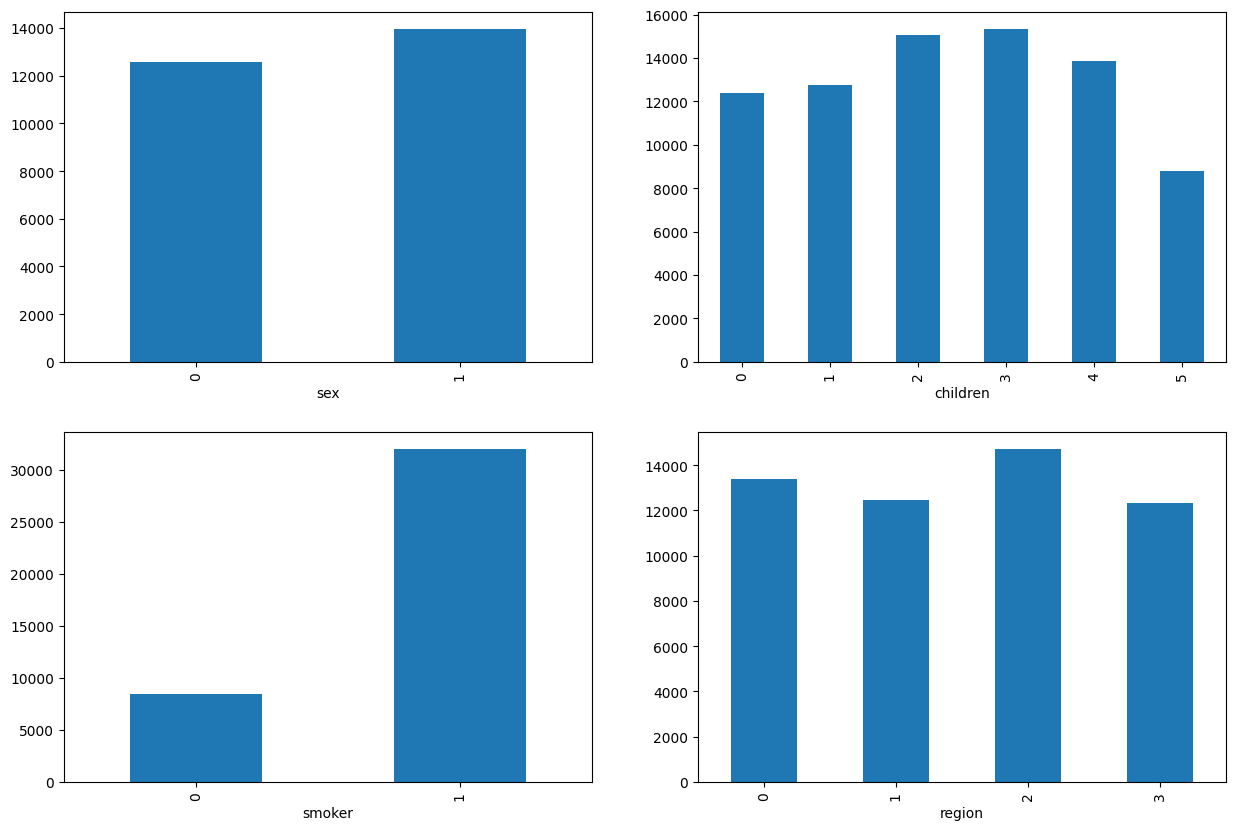

In [25]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

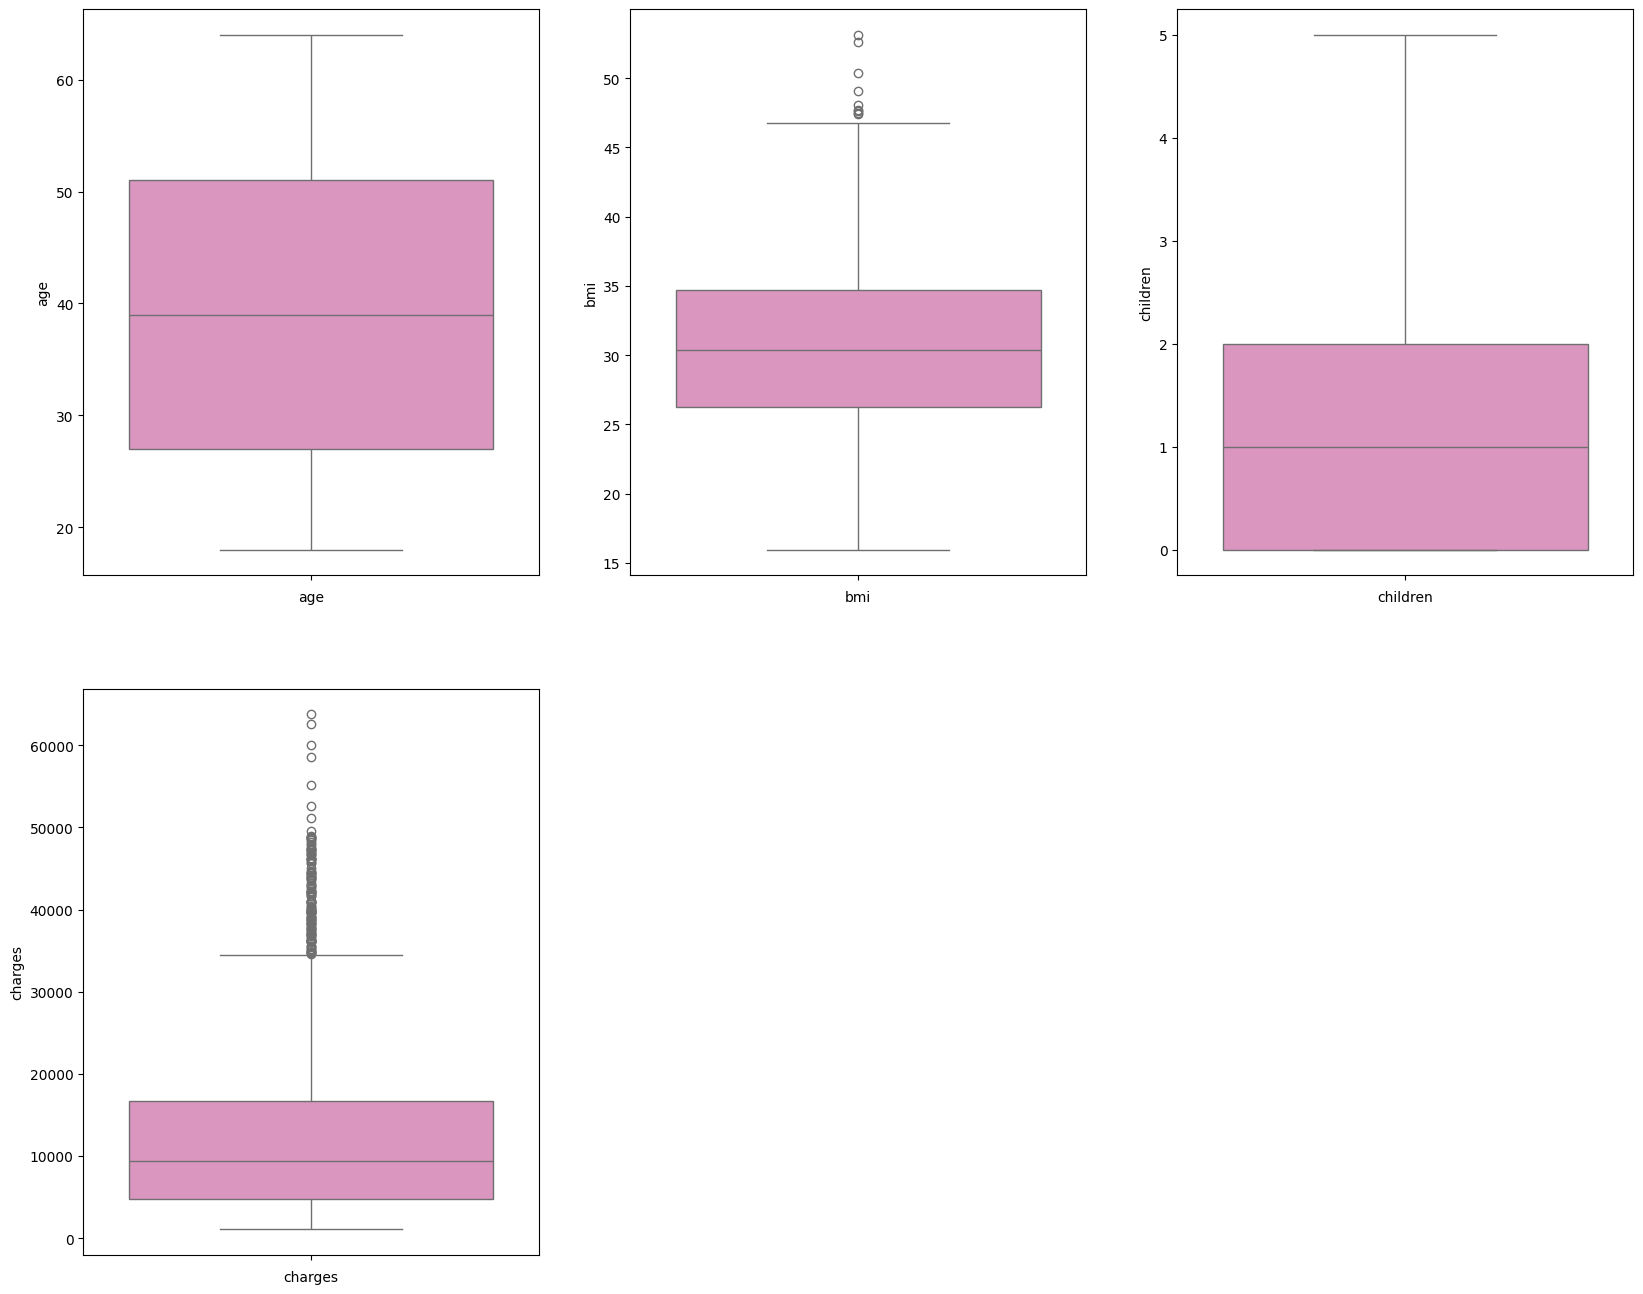

In [26]:
# lets check the outliers by plotting boxplot
plt.figure(figsize=(20,25))
p=1
for col in numerical_col:
    if p<9:
        plt.subplot(3,3,p)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col)
    p +=1
plt.show()

In [27]:
# So we have found outlier in one bmi column
from scipy.stats import zscore
out_features=df[['age','bmi','children']]
z=np.abs(zscore(out_features))
z

,age,bmi,children
0,1.440418,0.453160,0.909234
1,1.511647,0.509422,0.079442
2,0.799350,0.383155,1.580143
3,0.443201,1.305052,0.909234
4,0.514431,0.292456,0.909234
...,...,...,...
1333,0.767704,0.050269,1.580143
1334,1.511647,0.206053,0.909234
1335,1.511647,1.014490,0.909234
1336,1.297958,0.797524,0.909234


In [130]:
df_zsc=df[(z<3).all(axis=1)]
df_zsc.shape

(1315, 7)

In [131]:
print("Data Loss Percentage with zscore",((df.shape[0]-df_zsc.shape[0])/df.shape[0])*100)

Data Loss Percentage with zscore 1.6454749439042633


In [30]:
# here we found if i remove outlier then i am losing the 1.6% data.

<Axes: ylabel='bmi'>

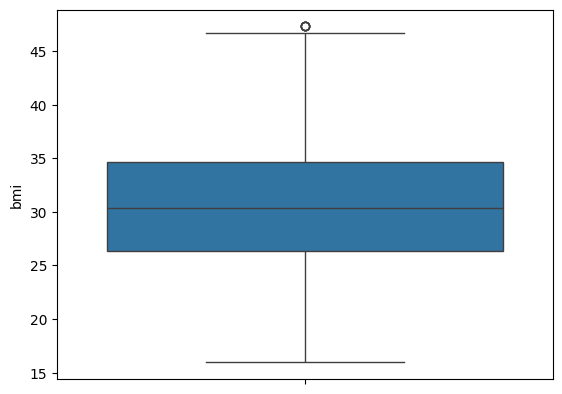

In [132]:
# after removing the oullier
sns.boxplot(data=df_zsc["bmi"])

In [133]:
# Check the IQR method
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


<Axes: ylabel='bmi'>

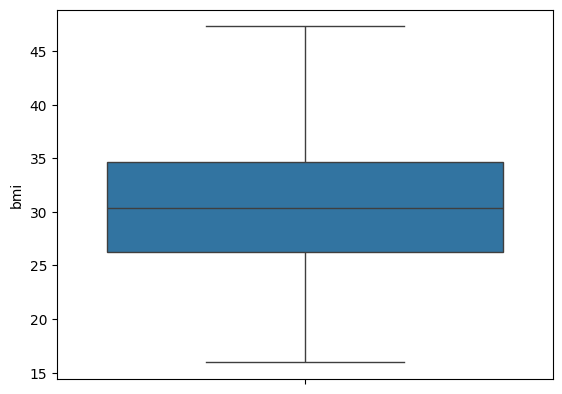

In [33]:
# !pip install feature_engine
# check outlier with IQR method
# Q1 = df["bmi"].quantile(0.25)
# Q3 = df["bmi"].quantile(0.75)
# IQR = Q3 - Q1

# outlier_filter = ~((df["bmi"] < (Q1 - 1.5 * IQR)) | (df["bmi"] > (Q3 + 1.5 * IQR)))

# df_outlier_remove = df[outlier_filter]

import feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [34]:
# Check the data shape
df.shape[0]

1337

# Checked the Skewness

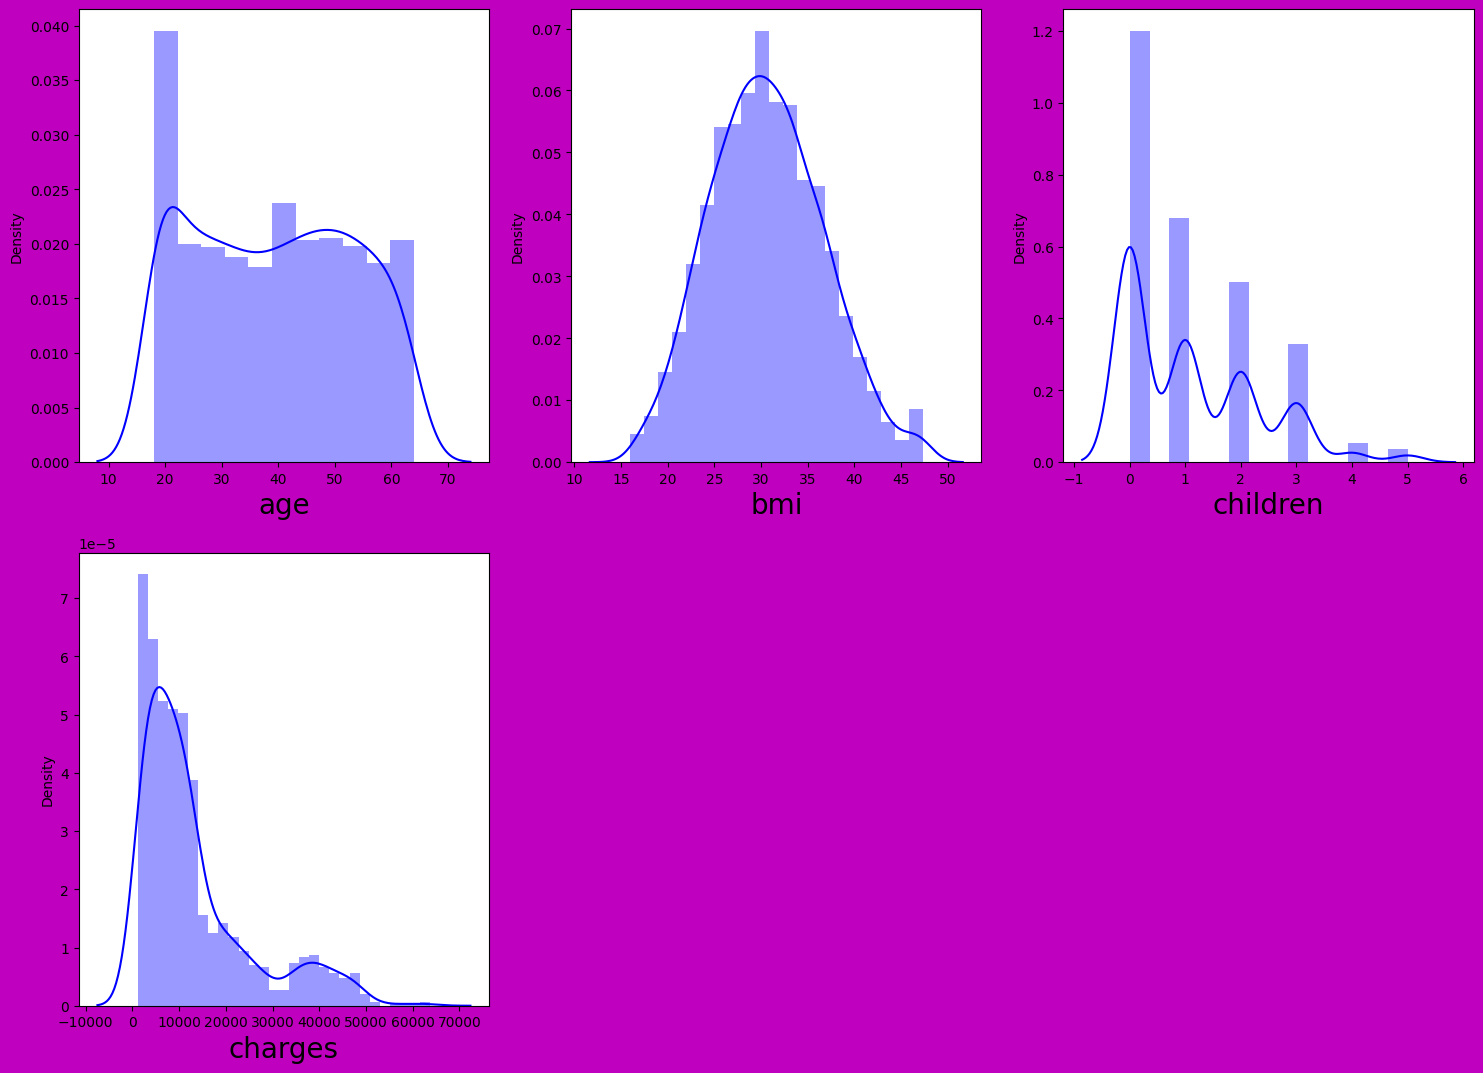

In [35]:
# checking how the data has been distributed in each column
plt.figure(figsize=(18,20),facecolor="m")
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [36]:
# checking the skewness
df.skew()

age         0.054781
sex        -0.019469
bmi         0.232892
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

Data in numerical column approximately in form a Normal distribution.

# Correlation check

In [37]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.111998,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.044831,0.017848,0.076596,0.004936,0.058044
bmi,0.111998,0.044831,1.000000,0.013692,0.003151,0.157818,0.199063
children,0.041536,0.017848,0.013692,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003151,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157818,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.199063,0.067389,0.787234,-0.006547,1.000000


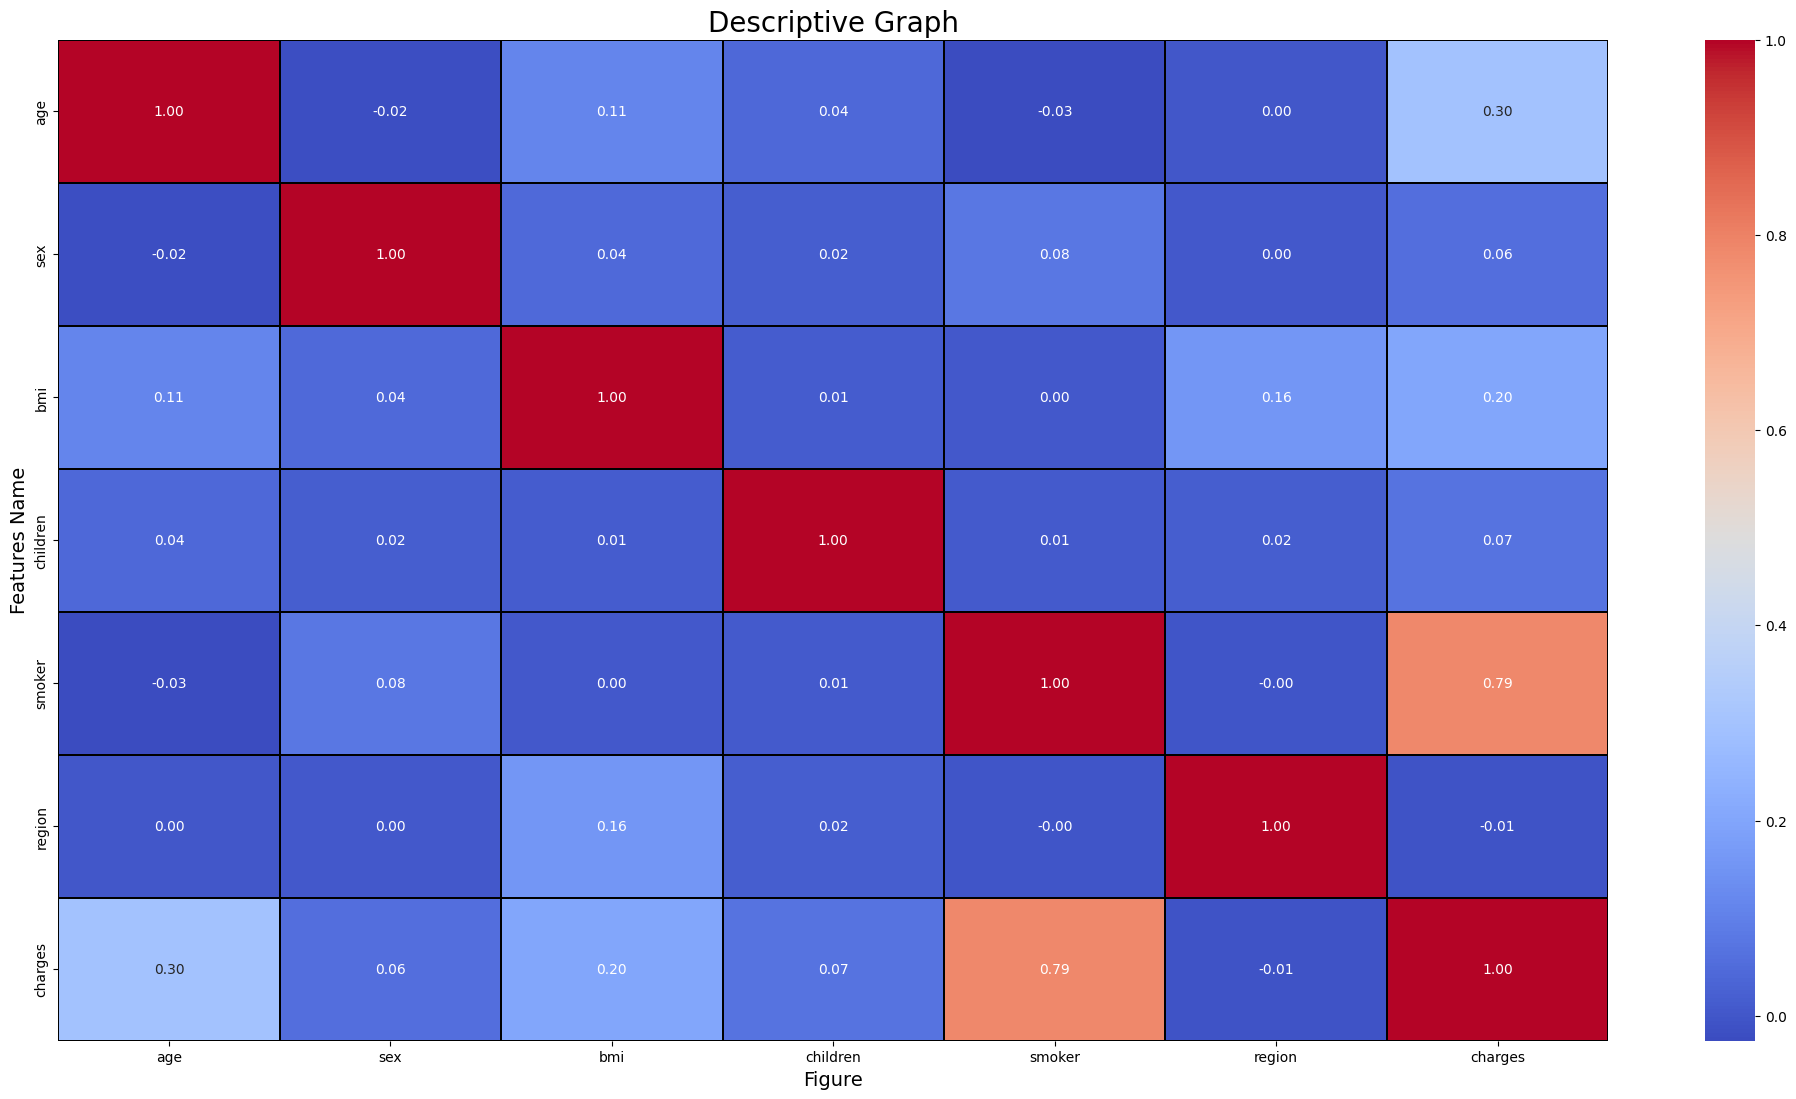

In [38]:
plt.figure(figsize=(25,13))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidths=0.2,linecolor='black',cmap="coolwarm")
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features Name',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

here smoker are  highly positive correlated with target column(charges).

# Separate features and label

In [39]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [40]:
X.shape

(1337, 6)

In [41]:
Y.shape

(1337,)

# Feature scaling using Standard Scaler

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X

,age,sex,bmi,children,smoker,region
0,-1.440418,-1.009771,-0.454032,-0.909234,1.969660,1.343163
1,-1.511647,0.990324,0.515033,-0.079442,-0.507702,0.438017
2,-0.799350,0.990324,0.387915,1.580143,-0.507702,0.438017
3,-0.443201,0.990324,-1.311662,-0.909234,-0.507702,-0.467128
4,-0.514431,0.990324,-0.292246,-0.909234,-0.507702,-0.467128
...,...,...,...,...,...,...
1332,0.767704,0.990324,0.052787,1.580143,-0.507702,-0.467128
1333,-1.511647,-1.009771,0.209621,-0.909234,-0.507702,-1.372274
1334,-1.511647,-1.009771,1.023503,-0.909234,-0.507702,0.438017
1335,-1.297958,-1.009771,-0.800716,-0.909234,-0.507702,1.343163


# Checking Variance Inflation Factor

In [43]:
# Finding variance inflation factor in each scaled columnn i.e x.shape[1] (1/1-R2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif["Features"]=X.columns
vif

,VIF values,Features
0,1.015927,age
1,1.008778,sex
2,1.041205,bmi
3,1.002421,children
4,1.006554,smoker
5,1.026066,region


# Modeling

In [50]:
# !pip install scikit-learn --upgrade
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [66]:
# finding the best Random State for Linear regression
# max_cost_accuracy=0
# random_state_max=0
# for i in range(20,70):
#     x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=i)
#     lr=LinearRegression()
#     lr.fit(x_train,y_train)
#     pred=lr.predict(x_test)
#     pred_accuracy=r2_score(y_test,pred)
#     if(max_cost_accuracy<pred_accuracy):
#         max_cost_accuracy=pred_accuracy
#         random_state_max=i

# print(f"Maximum r2 score is {max_cost_accuracy} on Random_state {random_state_max} ")
train=[]
test=[]
for i in range(30,80):
  xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=i)
  lr=LinearRegression()
  lr.fit(xtrain,ytrain)
  train.append(lr.score(xtrain,ytrain))
  test.append(lr.score(xtest,ytest))
df_check_random=pd.DataFrame({'train acc':train,'test acc':test},index=range(30,80))
print(df_check_random)

    train acc  test acc
30   0.751537  0.744964
31   0.752253  0.740485
32   0.740632  0.789228
33   0.752911  0.739553
34   0.758789  0.719466
35   0.749816  0.752940
36   0.747916  0.758805
37   0.758543  0.714619
38   0.754562  0.728582
39   0.756767  0.726484
40   0.741989  0.778965
41   0.756522  0.708109
42   0.729813  0.806985
43   0.754367  0.734187
44   0.743264  0.780474
45   0.753409  0.733273
46   0.741423  0.777238
47   0.731825  0.797602
48   0.752463  0.741935
49   0.757217  0.720649
50   0.735804  0.803831
51   0.745164  0.768926
52   0.746154  0.762499
53   0.751165  0.744140
54   0.758839  0.707640
55   0.766388  0.683567
56   0.763498  0.698066
57   0.765650  0.682720
58   0.752015  0.742575
59   0.733719  0.805115
60   0.754778  0.731109
61   0.748635  0.757870
62   0.765065  0.656969
63   0.751488  0.744711
64   0.745276  0.769200
65   0.742396  0.777252
66   0.749837  0.751678
67   0.754338  0.735203
68   0.751537  0.746057
69   0.760741  0.712266
70   0.749693  0

In [65]:
# finding the best Random State for RandomForest Regressor
max_cost_accuracy=0
random_state_max=0
for i in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    pred_accuracy=r2_score(y_test,pred)
    if(max_cost_accuracy<pred_accuracy):
        max_cost_accuracy=pred_accuracy
        random_state_max=i

print(f"Maximum r2 score is {max_cost_accuracy} on Random_state {random_state_max} ")


Maximum r2 score is 0.9012818125554238 on Random_state 50 


In [72]:
# So above two methos i found that RandomForestRegressor() have best accuracy on random_state 50

In [73]:
# Again the train_test_split with 168 random state
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=50)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [98]:
# Accuracy check with Linear Regression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred_lr=lr.predict(X_test)
pred_train=lr.predict(X_train)
print(lr)
print('R2_score',r2_score(Y_test,pred_lr))
print('R2_score on training Data:',r2_score(Y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(Y_test,pred_lr))
print("Mean Squared error: ",mean_squared_error(Y_test,pred_lr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test,pred_lr)))

# Cross validation with Linear Regression
score=cross_val_score(lr,X,Y,cv=10,scoring='r2')
print('cv score : ',score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(Y_test,pred_lr)-score.mean())*100)

LinearRegression()
R2_score 0.8038313690532434
R2_score on training Data: 73.58042432489904
Mean Absolute Error : 3825.3422564890916
Mean Squared error:  30387952.59914122
Root Mean Squared Error: 5512.526879675166
cv score :  0.7446396184191257
Difference between R2 score and cross validation score is : 5.919175063411764


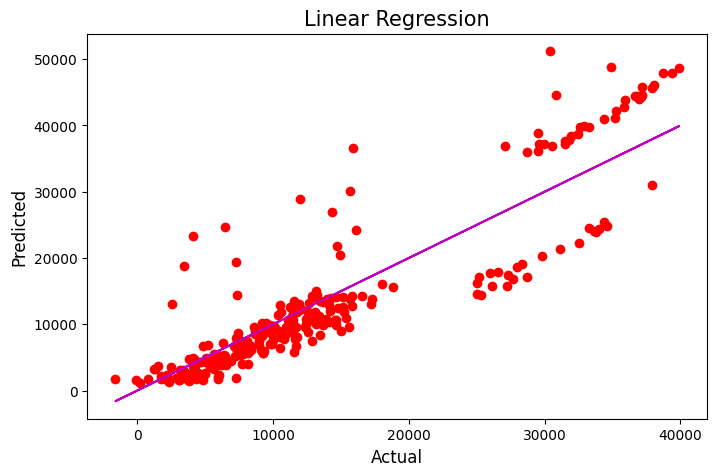

In [79]:
plt.figure(figsize=(8,5))
plt.scatter(x=pred_lr,y=Y_test,color='r')
plt.plot(pred_lr,pred_lr,color='m')
plt.xlabel("Actual",fontsize=12)
plt.ylabel("Predicted",fontsize=12)
plt.title("Linear Regression",fontsize=15)
plt.show()

In [99]:
# Accuracy check with RandomForest Regressor
rfr=RandomForestRegressor()
rfr.fit(X_train,Y_train)
pred_rfr=rfr.predict(X_test)
pred_train=rfr.predict(X_train)
print(rfr)
print('R2_score',r2_score(Y_test,pred_rfr))
print('R2_score on training Data:',r2_score(Y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(Y_test,pred_rfr))
print("Mean Squared error: ",mean_squared_error(Y_test,pred_rfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test,pred_rfr)))

# Cross validation with Random Forest Regressor
score=cross_val_score(rfr,X,Y,cv=10,scoring='r2')
print('cv_score: ',score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(Y_test,pred_rfr)-score.mean())*100)


RandomForestRegressor()
R2_score 0.900831068699023
R2_score on training Data: 97.2917089183138
Mean Absolute Error : 2362.2338783826
Mean Squared error:  15361991.20694025
Root Mean Squared Error: 3919.4376136048204
cv_score:  0.8348453893740772
Difference between R2 score and cross validation score is : 6.598567932494581


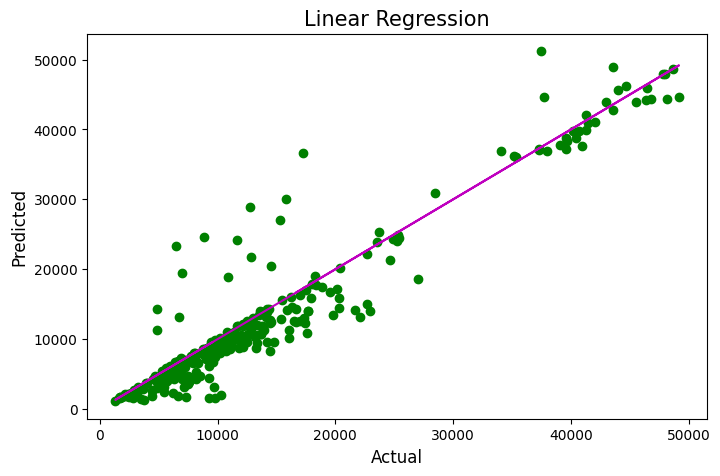

In [100]:
plt.figure(figsize=(8,5))
plt.scatter(x=pred_rfr,y=Y_test,color='g')
plt.plot(pred_rfr,pred_rfr,color='m')
plt.xlabel("Actual",fontsize=12)
plt.ylabel("Predicted",fontsize=12)
plt.title("Linear Regression",fontsize=15)
plt.show()

In [101]:
# Accuracy check with KNN
knn=KNN()
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)
print(knn)
print('R2_score',r2_score(Y_test,pred_knn))
print('R2_score on training Data:',r2_score(Y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(Y_test,pred_knn))
print("Mean Squared error: ",mean_squared_error(Y_test,pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test,pred_knn)))
# Cross validation with KNN
score=cross_val_score(knn,X,Y,cv=5,scoring='r2')

print('cv score: ',score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(Y_test,pred_knn)-score.mean())*100)

KNeighborsRegressor()
R2_score 0.8739523872186152
R2_score on training Data: 86.23693605366971
Mean Absolute Error : 2806.8227543126864
Mean Squared error:  19525695.132547684
Root Mean Squared Error: 4418.788876213445
cv score:  0.8056225944874553
Difference between R2 score and cross validation score is : 6.832979273115991


In [95]:
# Accuracy check with SVR
svr=SVR()
svr.fit(X_train,Y_train)
pred_svr=svr.predict(X_test)
pred_train=svr.predict(X_train)
print(svr)
print('R2_score',r2_score(Y_test,pred_svr))
print('R2_score on training Data:',r2_score(Y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(Y_test,pred_svr))
print("Mean Squared error: ",mean_squared_error(Y_test,pred_svr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test,pred_svr)))

# Cross validation with SVR
score=cross_val_score(svr,X,Y,cv=5,scoring='r2')
print('cv_score :',score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(Y_test,pred_svr)-score.mean())*100)

SVR()
R2_score -0.12236893525921833
R2_score on training Data: -9.937430738334863
Mean Absolute Error : 8419.516796184897
Mean Squared error:  173863139.27359158
Root Mean Squared Error: 13185.717245322363
cv_score : -0.099564575639373
Difference between R2 score and cross validation score is : -2.2804359619845322


In [102]:
# Accuracy check with GradientBoosting Regressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
pred_gbr=gbr.predict(X_test)
pred_train=gbr.predict(X_train)
print(gbr)
print('R2_score',r2_score(Y_test,pred_gbr))
print('R2_score on training Data:',r2_score(Y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(Y_test,pred_gbr))
print("Mean Squared error: ",mean_squared_error(Y_test,pred_gbr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test,pred_gbr)))

# Cross validation with GradientBoosting Regressor
score=cross_val_score(gbr,X,Y,cv=5,scoring='r2')
print('cv score :',score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(Y_test,pred_gbr)-score.mean())*100)

GradientBoostingRegressor()
R2_score 0.9152397087616717
R2_score on training Data: 89.22576309094072
Mean Absolute Error : 2212.966143071782
Mean Squared error:  13129987.705010848
Root Mean Squared Error: 3623.5324898516983
cv score : 0.8554512823174292
Difference between R2 score and cross validation score is : 5.978842644424254


In [103]:
# Accuracy check with Lasso
ls=Lasso()
ls.fit(X_train,Y_train)
pred_ls=ls.predict(X_test)
pred_train=ls.predict(X_train)
print(ls)
print('R2_score',r2_score(Y_test,pred_ls))
print('R2_score on training Data:',r2_score(Y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(Y_test,pred_ls))
print("Mean Squared error: ",mean_squared_error(Y_test,pred_ls))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test,pred_ls)))

# Cross validation with Lasso
score=cross_val_score(ls,X,Y,cv=5,scoring='r2')
print('cv score :',score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(Y_test,pred_ls)-score.mean())*100)

Lasso()
R2_score 0.8038101990695147
R2_score on training Data: 73.58042034892513
Mean Absolute Error : 3825.5485654851555
Mean Squared error:  30391231.98412224
Root Mean Squared Error: 5512.824320085145
cv score : 0.7472379783248693
Difference between R2 score and cross validation score is : 5.65722207446454


In [104]:
# Accuracy check with Ridge
rg=Ridge()
rg.fit(X_train,Y_train)
pred_rg=rg.predict(X_test)
pred_train=rg.predict(X_train)
print(rg)
print('R2_score',r2_score(Y_test,pred_rg))
print('R2_score on training Data:',r2_score(Y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(Y_test,pred_rg))
print("Mean Squared error: ",mean_squared_error(Y_test,pred_rg))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test,pred_rg)))

# Cross validation with Ridge
score=cross_val_score(rg,X,Y,cv=5,scoring='r2')
print('cv score: ',score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(Y_test,pred_rg)-score.mean())*100)

Ridge()
R2_score 0.8037296584192041
R2_score on training Data: 73.58035889734107
Mean Absolute Error : 3827.7342005363016
Mean Squared error:  30403708.318652026
Root Mean Squared Error: 5513.955777720023
cv score:  0.7472378969866067
Difference between R2 score and cross validation score is : 5.649176143259737


In [109]:
# Accuracy check with DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)
print(dtr)
print('R2_score',r2_score(Y_test,pred_dtr))
print('R2_score on training Data:',r2_score(Y_train,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(Y_test,pred_dtr))
print("Mean Squared error: ",mean_squared_error(Y_test,pred_dtr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test,pred_dtr)))

# Cross validation with DecisionTrees Regressor
score=cross_val_score(dtr,X,Y,cv=5,scoring='r2')
print('cv score : ',score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(Y_test,pred_dtr)-score.mean())*100)

DecisionTreeRegressor()
R2_score 0.7696389173355351
R2_score on training Data: 99.8813160075874
Mean Absolute Error : 2860.324572985075
Mean Squared error:  35684612.91140162
Root Mean Squared Error: 5973.659925991906
cv score :  0.7120260220667854
Difference between R2 score and cross validation score is : 5.761289526874968


In [111]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
ext.fit(X_train,Y_train)
pred_ext=ext.predict(X_test)
pred_train=ext.predict(X_train)
print("R2_score:",r2_score(Y_test,pred_ext))
print("R2_score on training Data:",r2_score(Y_train,pred_train))
print("Mean Absolute Error:",mean_absolute_error(Y_test,pred_ext))
print("Mean Squared Error:",mean_squared_error(Y_test,pred_ext))
print("Root Squared Error:",np.sqrt(mean_squared_error(Y_test,pred_ext)))

# Cross validation with Random ExtraTrees Regressor
score=cross_val_score(ext,X,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(Y_test,pred_ext)-score.mean())*100)

R2_score: 0.8831125525041952
R2_score on training Data: 0.998813160075874
Mean Absolute Error: 2379.1629371264917
Mean Squared Error: 18106718.67767273
Root Squared Error: 4255.19901739892
[0.83760756 0.74541723 0.85053581 0.81522451 0.84446279]
0.8186495786654197
Difference between R2 score and cross validation score is : 6.446297383877553


In [114]:
# Accuracy check with XG boost Regressor
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,Y_train)
pred_xgb=xgb.predict(X_test)
pred_train=xgb.predict(X_train)
print("R2_score:",r2_score(Y_test,pred_xgb))
print("R2_score on training Data:",r2_score(Y_train,pred_train))
print("Mean Absolute Error:",mean_absolute_error(Y_test,pred_xgb))
print("Mean Squared Error:",mean_squared_error(Y_test,pred_xgb))
print("Root Squared Error:",np.sqrt(mean_squared_error(Y_test,pred_xgb)))

# Cross validation with XG Boost Regressor
score=cross_val_score(xgb,X,Y,cv=5,scoring='r2')
print('cv score :' ,score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(Y_test,pred_xgb)-score.mean())*100)

R2_score: 0.8772762139022502
R2_score on training Data: 0.9934288596970278
Mean Absolute Error: 2690.1911659847974
Mean Squared Error: 19010810.12151106
Root Squared Error: 4360.138773194159
cv score : 0.8026584021052837
Difference between R2 score and cross validation score is : 7.461781179696647


In [140]:
''' from the difference of both R2 score and cross Validation score computed on R2 score
we conclude that Gradient Boosting Regressor and XGBoosrt as our best fitting and best performing model
so we check one by one.
'''
# Check Hyper Para with GradientBoosting
from sklearn.model_selection import GridSearchCV
param={
          'loss' :['squared_error', 'absolute_error'],
          'learning_rate' :[0.1,0.22,0.15,0.19],
          'n_estimators' :[10,20,25,22,30,35],
          'criterion' :['friedman_mse','squared_error']
        }

gcv=GridSearchCV(GradientBoostingRegressor(),param,cv=5)
gcv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.22, 0.15, 0.19],
                         'loss': ['squared_error', 'absolute_error'],
                         'n_estimators': [10, 20, 25, 22, 30, 35]})

In [141]:
gcv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.19,
 'loss': 'squared_error',
 'n_estimators': 22}

In [142]:
Model=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.19,loss= 'squared_error',n_estimators=22)
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print("R2_score:",r2_score(y_test,pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.8338002928040634
Mean Absolute Error: 2557.8843954385143
Mean Squared Error: 21489380.94942661
Root Mean Squared Error: 4635.664024649178


Model Accuracy is not good So Go the next XGBoost Regressor

In [148]:
# Check Hyper Para with XGBoost
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
xgg=XGBRegressor()
# param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6),
    "n_estimators": randint(100, 150),
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(xgg, param_distributions=params, random_state=42, n_iter=100, cv=5, n_jobs=1, return_train_score=True)
search.fit(X_train, Y_train)
print(search.best_params_)
# grid=GridSearchCV(xgg,param_grid,scoring="r2",cv=5)
# grid.fit(X_train,Y_train)
# print(grid.best_params_)
# xgmodel=XGBRegressor('colsample_bytree': 0.9260134555776824, 'gamma': 0.18812979276545788, 'learning_rate': 0.055050215009600625, 'max_depth': 2, 'n_estimators': 143, 'subsample': 0.8233616998943221)
# xgmodel.fit(X_train,Y_train)
# pred_xg=xgmodel.predict(X_test)
# pred_train=xgmodel.predict(X_train)
# print("R2_score:",r2_score(Y_test,pred_xg))
# print("R2_score on training Data:",r2_score(Y_train,pred_train))

{'colsample_bytree': 0.9260134555776824, 'gamma': 0.18812979276545788, 'learning_rate': 0.055050215009600625, 'max_depth': 2, 'n_estimators': 143, 'subsample': 0.8233616998943221}


In [166]:
xgmodel = XGBRegressor(colsample_bytree=0.9260134555776824,
                       gamma=0.18812979276545788,
                       learning_rate=0.055050215009600625,
                       max_depth=2,
                       n_estimators=143,
                       subsample=0.8233616998943221)
xgmodel.fit(X_train,Y_train)
pred_xg=xgmodel.predict(X_test)
pred_train=xgmodel.predict(X_train)
print("R2_score:",r2_score(Y_test,pred_xg))
print("R2_score on training Data:",r2_score(Y_train,pred_train))
print('cv_score: ',cross_val_score(xgmodel,X,Y,cv=5,).mean())

R2_score: 0.9173109658784762
R2_score on training Data: 0.8632745443893899
cv_score:  0.8586661068298549


In [155]:
param_grid={'n_estimators':[10,15,20,25,40,50],'max_depth':[1,2,3,4,5],'gamma':[0,0.15,0.3,0.7,0.5,1]}
grid_search=GridSearchCV(xgg,param_grid,scoring="r2",cv=5)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'gamma': 0, 'max_depth': 3, 'n_estimators': 15}


In [164]:
xg_model = XGBRegressor(gamma= 0, max_depth= 3, n_estimators= 15)
xg_model.fit(X_train,Y_train)
pred_xg=xg_model.predict(X_test)
pred_train=xg_model.predict(X_train)
print("R2_score:",r2_score(Y_test,pred_xg))
print("R2_score on training Data:",r2_score(Y_train,pred_train))
print('cv_score: ',cross_val_score(xg_model,X,Y,cv=5,).mean())

R2_score: 0.9182790911136346
R2_score on training Data: 0.8697511681797857
cv_score:  0.8606266871712276


So here we conclude that xg_model is the final model with GridsearchCV.

In [165]:
# imp_feats=pd.DataFrame(data=grid_search.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
# imp_feats.sort_values(by='Importance',ascending=False)
# new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
# new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
# new_data=new_data.drop(new_data[['sex','region']],axis=1)
# finalmodel.predict(new_data)
# df.drop(df[['sex','region']],axis=1,inplace=True)
# X_feature=df.drop(df[['charges']],axis=1)
# X=df.drop(df[['charges']],axis=1)
# x_train,x_test,y_train,y_test=train_test_split(X_feature,Y,test_size=0.2,random_state=42)
# finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
# finalmodel.fit(x_train,y_train)
# pred_train_final=finalmodel.predict(x_train)
# pred_final_test=finalmodel.predict(x_test)
# print('Training Accuracy :',r2_score(y_train,pred_train_final))
# print('Test Accuract :',r2_score(y_test,pred_final_test))
# print('Cross Validate score: ',cross_val_score(finalmodel,X,Y,cv=5,).mean())

In [167]:
import pickle
filename="Medical Cost Insurance.pkl"
pickle.dump(xg_model,open(filename,'wb')) #saved model

In [168]:
import pickle
loaded_model=pickle.load(open("Medical Cost Insurance.pkl",'rb'))
result=loaded_model.score(X_test,Y_test)
print(result*100)

91.82790911136345


In [169]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"])
conclusion.head()

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predicted,11067.000977,3044.72168,13968.594727,3425.379639,12193.053711,19638.386719,11068.171875,39271.105469,4151.730957,44183.296875,...,17095.882812,10190.922852,17405.351562,5968.586914,4353.781738,3477.702637,16526.681641,16644.011719,37170.640625,14394.037109
Original,8988.158750,1880.48700,14256.192800,1727.785000,10601.632250,16776.304050,9880.068000,37701.876800,2055.324900,45863.205000,...,14007.222000,10977.206300,15817.985700,6666.243000,1727.540000,1967.022700,12928.791100,36580.282160,37133.898200,12495.290850


In [173]:
# Test On new Data
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data['sex']=new_data['sex'].map({'male':1,'female':0})
new_data['region']=new_data['region'].map({'northeast':0,'northwest':1,'southeast':2,'southwest':3})
charge=loaded_model.predict(new_data)
print(charge)

[14930.703]
